## Import common packages

In [1]:
import pandas as pd
import numpy as np
import nltk

## Load Cleaned Data Set

In [2]:
cleanDF = pd.read_csv("C:\git\CSML1010-Group_11-Final-Project\proposal\Tweets_cleaned.csv") 
cleanDF.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'text',
       'text_cleaned', 'emojis_flag', 'emojis', 'emoticons_flag', 'emoticons',
       'text_cleaned_without_emojis_emoticons', 'hashtags',
       'text_cleaned_without_emojis_emoticons_hashtags', 'hashtags_flag',
       'text_cleaned_lower_case', 'text_cleaned_no_abbreviations',
       'text_list_no_stop_words', 'lemmas_list'],
      dtype='object')

## Bag of Words Model

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(cleanDF['lemmas_list'].values.astype('U'))
#.values.astype('U') converts the column of words to a unicode string
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

#pd.options.display.max_columns = 100
#pd.set_option('display.max_rows', 100)

#pd.DataFrame(cv_matrix, columns=vocab).to_csv("bagofwords.csv")

,00,000,000114,000lb,00a,00am,00p,00pm,01,01pm,...,zambia,zcc82u,zero,zig,zip,zipper,zone,zoom,zuke,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bag of N-Grams

In [6]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(cleanDF['lemmas_list'].values.astype('U'))

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

#pd.DataFrame(bv_matrix, columns=vocab).to_csv("bagofngrams.csv")

## TF-IDF Model

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(cleanDF['lemmas_list'].values.astype('U'))
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

#pd.DataFrame(np.round(tv_matrix, 2), columns=vocab).to_csv("tfidfmodel.csv")

,00,000,000114,000lb,00a,00am,00p,00pm,01,01pm,...,zambia,zcc82u,zero,zig,zip,zipper,zone,zoom,zuke,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Document Similarity

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

#similarity_df.to_csv("documentsimilarity.csv")

,0,1,2,3,4,5,6,7,8,9,...,14630,14631,14632,14633,14634,14635,14636,14637,14638,14639
0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.084757,0.0,0.000000,0.000000,0.0,0.000000,0.114465
3,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,1.0,0.307344,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.000000,0.0,0.0,0.028866,0.0,0.0,0.0,0.0,...,0.30427,0.188921,0.0,0.052285,0.0,1.000000,0.046479,0.0,0.033641,0.070611
14636,0.0,0.0,0.000000,0.0,0.0,0.026716,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.098288,0.0,0.046479,1.000000,0.0,0.031135,0.065351
14637,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000
14638,0.0,0.0,0.000000,0.0,0.0,0.019337,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.035024,0.0,0.033641,0.031135,0.0,1.000000,0.047300


## Word2Vec Word Embedding Model
### Training with CBOW (Continuous Bag of Words)

#### Build Vocabulary

In [3]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(cleanDF['lemmas_list'].values.astype('U'))
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in cleanDF['lemmas_list'].values.astype('U')]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Using TensorFlow backend.


Vocabulary Size: 8872
Vocabulary Sample: [('flight', 1), ('thank', 2), ('hour', 3), ('cancel', 4), ('service', 5), ('time', 6), ('delay', 7), ('customer', 8), ('help', 9), ('get', 10)]


#### Build (context_words, target_word) pair generator

In [4]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [5]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['plus', 'add', 'experience', 'tacky'] -> Target (Y): commercial
Context (X): ['aggressive', 'blast', 'entertainment', 'guest'] -> Target (Y): obnoxious
Context (X): ['blast', 'obnoxious', 'guest', 'face'] -> Target (Y): entertainment
Context (X): ['obnoxious', 'entertainment', 'face', 'little'] -> Target (Y): guest
Context (X): ['entertainment', 'guest', 'little', 'recourse'] -> Target (Y): face
Context (X): ['seriously', 'pay', 'seat', 'playing'] -> Target (Y): flight
Context (X): ['pay', 'flight', 'playing', 'bad'] -> Target (Y): seat
Context (X): ['flight', 'seat', 'bad', 'thing'] -> Target (Y): playing
Context (X): ['seat', 'playing', 'thing', 'fly'] -> Target (Y): bad
Context (X): ['playing', 'bad', 'fly', 'va'] -> Target (Y): thing
Context (X): ['yes', 'nearly', 'fly', 'vx'] -> Target (Y): time


#### Build CBOW Deep Network Model

In [6]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

import tensorflow as tf
with tf.device('/gpu:0'):
    
    cbow = Sequential()
    cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
    cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
    cbow.add(Dense(vocab_size, activation='softmax'))

    cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    print(cbow.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 100)            887200    
_________________________________________________________________
lambda_1 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8872)              896072    
Total params: 1,783,272
Trainable params: 1,783,272
Non-trainable params: 0
_________________________________________________________________
None


##### Visualize Model

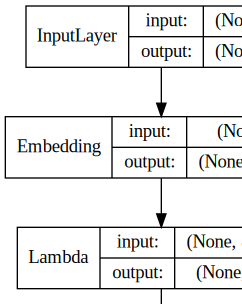

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

#### Train model for 5 epochs

In [8]:
with tf.device('/gpu:0'):
    for epoch in range(1, 6):
        loss = 0.
        i = 0
        for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
            i += 1
            loss += cbow.train_on_batch(x, y)
            if i % 100000 == 0:
                print('Processed {} (context, word) pairs'.format(i))

        print('Epoch:', epoch, '\tLoss:', loss)
        print()

C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Processed 100000 (context, word) pairs
Epoch: 1 	Loss: 979676.5482287072

Processed 100000 (context, word) pairs
Epoch: 2 	Loss: 1150841.0040687358

Processed 100000 (context, word) pairs
Epoch: 3 	Loss: 1327555.1419043199

Processed 100000 (context, word) pairs
Epoch: 4 	Loss: 1430313.17555535

Processed 100000 (context, word) pairs
Epoch: 5 	Loss: 1488690.2874767226



#### Get word embeddings

In [12]:

weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

#pd.DataFrame(weights, index=list(id2word.values())[1:]).to_csv("word2vecCBOWtrained.csv")

(8871, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thank,-0.973014,-0.237087,-0.949835,-1.388790,0.508189,-1.322769,-1.209077,-0.997021,-0.832231,-0.744838,...,-1.399371,0.680298,0.796128,-0.249500,-1.346166,1.338733,-0.711253,0.979931,-0.932362,-0.566355
hour,-0.661432,-0.597737,-0.473699,-0.801890,0.847197,-0.843243,-0.601769,-0.734514,-0.819933,-0.595527,...,-0.668530,1.017192,0.883001,-0.745975,-0.659732,0.680380,-0.510498,0.708858,-0.937336,-0.516926
cancel,-0.644435,-0.475534,-0.200657,-0.709675,0.445708,-0.674194,-0.792779,-0.610153,-0.521107,-0.643647,...,-0.433170,0.073702,0.093708,-0.497137,-1.066782,0.553711,-1.112064,0.724839,-0.226349,-0.537598
service,-0.388470,-0.641156,-0.308133,0.042066,0.722122,-0.467027,-0.400988,-1.254456,-0.709804,-0.194736,...,-0.750193,0.277481,0.364837,-1.266234,-0.770386,0.120043,-0.251774,0.609249,-0.983361,-0.287313
time,-0.817001,-0.451579,-0.282511,-0.480582,0.425212,-0.433361,-0.861477,-0.625924,0.011192,-0.157233,...,-0.828721,0.646482,0.629616,-0.594393,-0.924453,0.456093,-0.825219,0.110073,-0.345347,-0.454575


#### Build a distance matrix to view the most similar words (contextually)¶

In [23]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['flight', 'airline', 'good', 'bad', 'late', 'seat', 'amazing', 'experience']}

similar_words

(8871, 8871)


{'flight': ['fly', 'plane', 'bag', 'thank', 'seat'],
 'airline': ['tell', 'want', 'employee', 'call', 'w'],
 'good': ['way', 'like', 'w', 'people', 'travel'],
 'bad': ['family', 'nice', 'ask', 'mean', 'ord'],
 'late': ['suppose', 'tonight', 'dca', 'start', 'schedule'],
 'seat': ['bag', 'fly', 'ticket', 'gate', 'w'],
 'amazing': ['fail', 'maybe', 'end', 'apology', 'drink'],
 'experience': ['tweet', 'start', 'instead', 'company', 'sure']}

## Word2Vec Word Embedding Model
### Training with Skip-Gram

## Word2Vec Word Embedding Model
### Using Pre-Trained Model

# General Testing

In [ ]:
import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))

In [1]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0
